<a href="https://colab.research.google.com/github/alanbseo/MFAworkshop/blob/main/MFA_1_DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data reading


This builidng MFA analysis requires data and software packages. 

 

In [ ]:
# Mount Gdrive 
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# list the files in the gdrive
!ls '/content/gdrive/MyDrive/Net zero built environment/MFA workshop' # modify the path as shown in your Gdrive folder list

Data  images


In [ ]:
!ls '/content/gdrive/MyDrive/'

 ActivityTags_trainingdata_v1.gsheet
'A new guideline for automated image classification using machine learing (for MEE).gdoc'
"Appropriate technologies for developing countries' greenhouse gas research "
'BeeWalk - Terrain, Climate, and Land Use variables (2020).gdoc'
 clc_legend_label4_Feb2020.gsheet
'Colab Notebooks'
'C-P file transfer_KIT_11Oct2018.gdoc'
'CRAFTY - landchange.earth page.gdoc'
 Donggul
'Grassland paper issues.gdoc'
'Habitat modelling and conservation area planning using camera-trap photos, computer vision, and network analysis: a case study of Yellow-throated marten in South Korea .gdoc'
'Landchange.earth - homepage layout .gslides'
'Literature_Guideline paper'
'Manual Evaluation'
'Middle Fork Activities - Shared'
'Net zero built environment'
'Title: EU’s forestation targets demand dietary rethink.gdoc'
 UML


In [ ]:
# set working directory
default_path = '/content/gdrive/MyDrive/Net zero built environment/MFA workshop'
#default_path = '/content/gdrive/MyDrive/MFA workshop'

import os
os.chdir(default_path)
# verification
print(os.getcwd())          #print the current working directory 



/content/gdrive/.shortcut-targets-by-id/1gDT-7hKMl37JnTVecJLmI9yB2rUI7rAo/Net zero built environment/MFA workshop


In [ ]:
!ls

Data  images


Please refer to this section for package management.

In [ ]:
# import packages
import matplotlib.pyplot as plt


In [ ]:
# import geopandas package (https://geopandas.org/en/stable/)
try:
  import geopandas as gpd
except:
  !pip install geopandas
  import geopandas as gpd


In [ ]:
os.listdir('Data/Data_100m/Jongno-gu')

['(B100)국토통계_건축물-건축물 수 합계 통계-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-개별주택가격-(격자) 100M_서울특별시 종로구_202206',
 '(B100)국토통계_건축물-시기별 건축물 수(35년 이상)-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-연면적-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-용적율-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-주거용도면적-(격자) 100M_서울특별시 종로구_202206',
 '(B100)국토통계_건축물-지상층수-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-지하층수-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_공시지가-공시지가-(격자) 100M_서울특별시 종로구_202207',
 '(B100)국토통계_건축물-건축면적-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-건폐율-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-구조코드-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-높이-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-대지면적-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-사용승인일-(격자) 100M_서울특별시 종로구_202303',
 '(B100)국토통계_건축물-시기별 건축물 수( 9년 이하)-(격자) 100M_서울특별시 종로구_202303']

In [ ]:
import geopandas as gpd

# Read the shapefile
# Built-up area data for Jongno-gu (Feb 2023)
path_data_area = "Data/Data_100m/Jongno-gu/(B100)국토통계_건축물-건축면적-(격자) 100M_서울특별시 종로구_202303/nlsp_021002008.shp"

builtuparea_gdf = gpd.read_file(path_data_area)

# Print the first few rows of the GeoDataFrame
print(builtuparea_gdf.head()) # Encoding error



            gid     lbl     val  \
0  ë¤ì¬551532   56.31   56.31   
1  ë¤ì¬564526  170.89  170.89   
2  ë¤ì¬539568  702.56  702.56   
3  ë¤ì¬526570  184.17  184.17   
4  ë¤ì¬548528  270.14  270.14   

                                            geometry  
0  POLYGON ((955100.000 1953200.000, 955100.000 1...  
1  POLYGON ((956400.000 1952600.000, 956400.000 1...  
2  POLYGON ((953900.000 1956800.000, 953900.000 1...  
3  POLYGON ((952600.000 1957000.000, 952600.000 1...  
4  POLYGON ((954800.000 1952800.000, 954800.000 1...  


In [ ]:
# Hangul encoded in UTF-8
builtuparea_gdf = gpd.read_file(path_data_area, encoding = "UTF-8")

print(builtuparea_gdf.head()) # now Grid ID in Hangul looks good

        gid     lbl     val                                           geometry
0  다사551532   56.31   56.31  POLYGON ((955100.000 1953200.000, 955100.000 1...
1  다사564526  170.89  170.89  POLYGON ((956400.000 1952600.000, 956400.000 1...
2  다사539568  702.56  702.56  POLYGON ((953900.000 1956800.000, 953900.000 1...
3  다사526570  184.17  184.17  POLYGON ((952600.000 1957000.000, 952600.000 1...
4  다사548528  270.14  270.14  POLYGON ((954800.000 1952800.000, 954800.000 1...


In [ ]:
builtuparea_gdf.dtypes

gid           object
lbl           object
val          float64
geometry    geometry
dtype: object

In [ ]:
# read other files
path_data_height = "Data/Data_100m/Jongno-gu/(B100)국토통계_건축물-높이-(격자) 100M_서울특별시 종로구_202303/nlsp_021002013.shp"
height_gdf = gpd.read_file(path_data_height, encoding = "UTF-8")
print(height_gdf.head())  

path_data_code = "Data/Data_100m/Jongno-gu/(B100)국토통계_건축물-구조코드-(격자) 100M_서울특별시 종로구_202303/nlsp_021002004.shp"
code_gdf = gpd.read_file(path_data_code, encoding = "UTF-8")
print(code_gdf.head())  



        gid    lbl    val                                           geometry
0  다사551532   7.31   7.31  POLYGON ((955100.000 1953200.000, 955100.000 1...
1  다사564526  19.32  19.32  POLYGON ((956400.000 1952600.000, 956400.000 1...
2  다사539568  14.19  14.19  POLYGON ((953900.000 1956800.000, 953900.000 1...
3  다사526570   7.31   7.31  POLYGON ((952600.000 1957000.000, 952600.000 1...
4  다사548528  21.25  21.25  POLYGON ((954800.000 1952800.000, 954800.000 1...
        gid lbl    val                                           geometry
0  다사516573  11  100.0  POLYGON ((951600.000 1957300.000, 951600.000 1...
1  다사517558  11  100.0  POLYGON ((951700.000 1955800.000, 951700.000 1...
2  다사517559  11  100.0  POLYGON ((951700.000 1955900.000, 951700.000 1...
3  다사517560  11  100.0  POLYGON ((951700.000 1956000.000, 951700.000 1...
4  다사517564  21  100.0  POLYGON ((951700.000 1956400.000, 951700.000 1...


In [ ]:
# Print data description
height_gdf.geometry.describe

<bound method NDFrame.describe of 0       POLYGON ((955100.000 1953200.000, 955100.000 1...
1       POLYGON ((956400.000 1952600.000, 956400.000 1...
2       POLYGON ((953900.000 1956800.000, 953900.000 1...
3       POLYGON ((952600.000 1957000.000, 952600.000 1...
4       POLYGON ((954800.000 1952800.000, 954800.000 1...
                              ...                        
2558    POLYGON ((954200.000 1958500.000, 954200.000 1...
2559    POLYGON ((953000.000 1958700.000, 953000.000 1...
2560    POLYGON ((954600.000 1956400.000, 954600.000 1...
2561    POLYGON ((954000.000 1954200.000, 954000.000 1...
2562    POLYGON ((952000.000 1958800.000, 952000.000 1...
Name: geometry, Length: 2563, dtype: geometry>

In [ ]:
print(builtuparea_gdf.columns)
print(height_gdf.columns)
print(code_gdf.columns) # take 'lbl' only. not sure what 'val' means here. 

# print data types
print(height_gdf.dtypes)
print(code_gdf.dtypes)
print(builtuparea_gdf.dtypes)

Index(['gid', 'lbl', 'val', 'geometry'], dtype='object')
Index(['gid', 'lbl', 'val', 'geometry'], dtype='object')
Index(['gid', 'lbl', 'val', 'geometry'], dtype='object')
gid           object
lbl           object
val          float64
geometry    geometry
dtype: object
gid           object
lbl           object
val          float64
geometry    geometry
dtype: object
gid           object
lbl           object
val          float64
geometry    geometry
dtype: object


In [ ]:
# Check CRS
print(height_gdf.crs)

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["central_meridian",127.5],PARAMETER["latitude_of_origin",38],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["m",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


Text(69.97222222222221, 0.5, 'Y (m)')

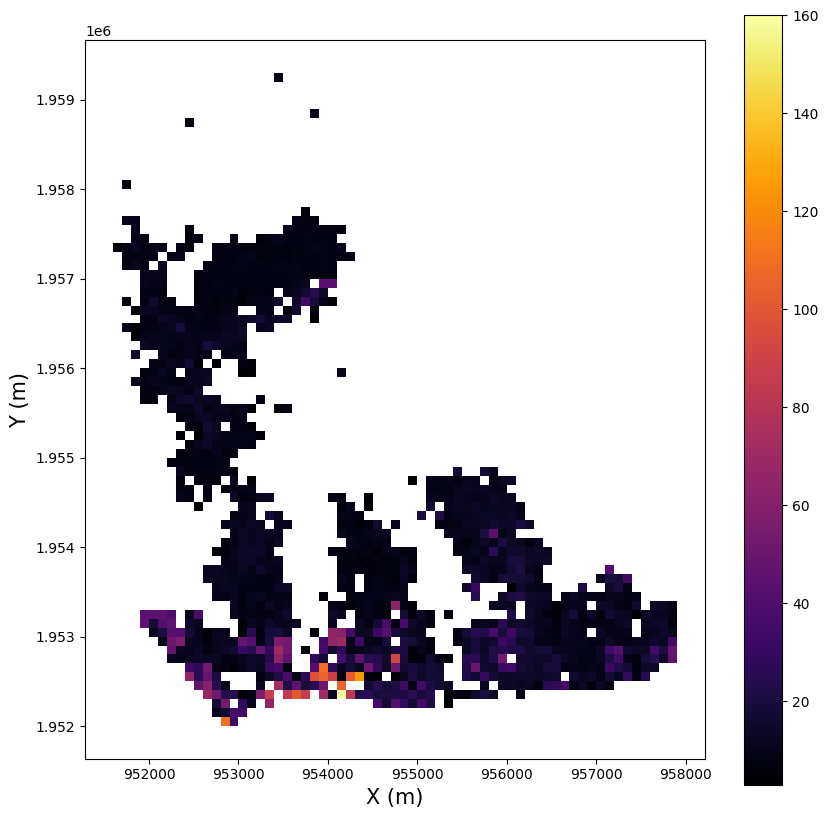

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10)) # create the ax object 
#height_gdf.plot(column='val', cmap='inferno',alpha=1,legend=True, ax= ax)


height_gdf.plot(column='val', cmap = "inferno", alpha=1, legend = True, ax = ax)
ax.set_xlabel('X (m)',fontsize=15)
ax.set_ylabel('Y (m)',fontsize=15)


['rasterized.tif',
 'Builtup_Jongno-gu.png',
 'Builtup_Jongno-gu_Feb2023.png',
 'height_100m.tif',
 'area_100m.tif',
 'volume_100m.tif',
 'code_100m.tif']

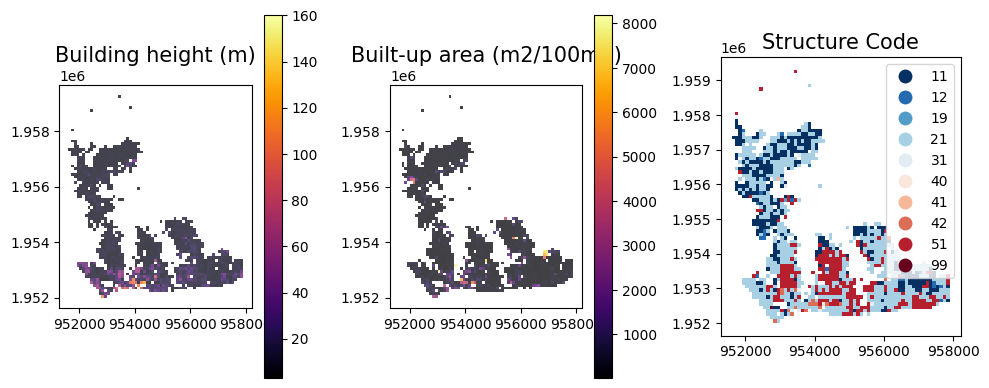

In [ ]:
# do a little more plotting
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10,4))


height_gdf.plot(column='val',cmap='inferno', alpha=0.75,legend=True, ax= ax[0])
builtuparea_gdf.plot(column='val',cmap='inferno',alpha=0.75,legend=True, ax = ax[1])
code_gdf.plot(column='lbl', cmap='RdBu_r',categorical=True, alpha=1,legend=True, ax=ax[2])

ax[0].set_title('Building height (m)',fontsize=15)
ax[1].set_title('Built-up area (m2/100m2)',fontsize=15)
ax[2].set_title('Structure Code',fontsize=15)
plt.tight_layout()


# can save the figure
if not os.path.exists('images'): 
   os.mkdir('images') # create a folder for output images

plt.savefig('images/Builtup_Jongno-gu_Feb2023.png',dpi=300)

os.listdir('images')

 플로팅한 이미지가 잘 저장되었는지 확인. 파일을 matplotlib과 PIL 두 가지 라이브러리를 이용해서 열어 봄 (결과는 동일).

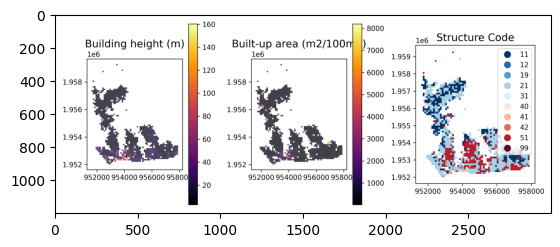

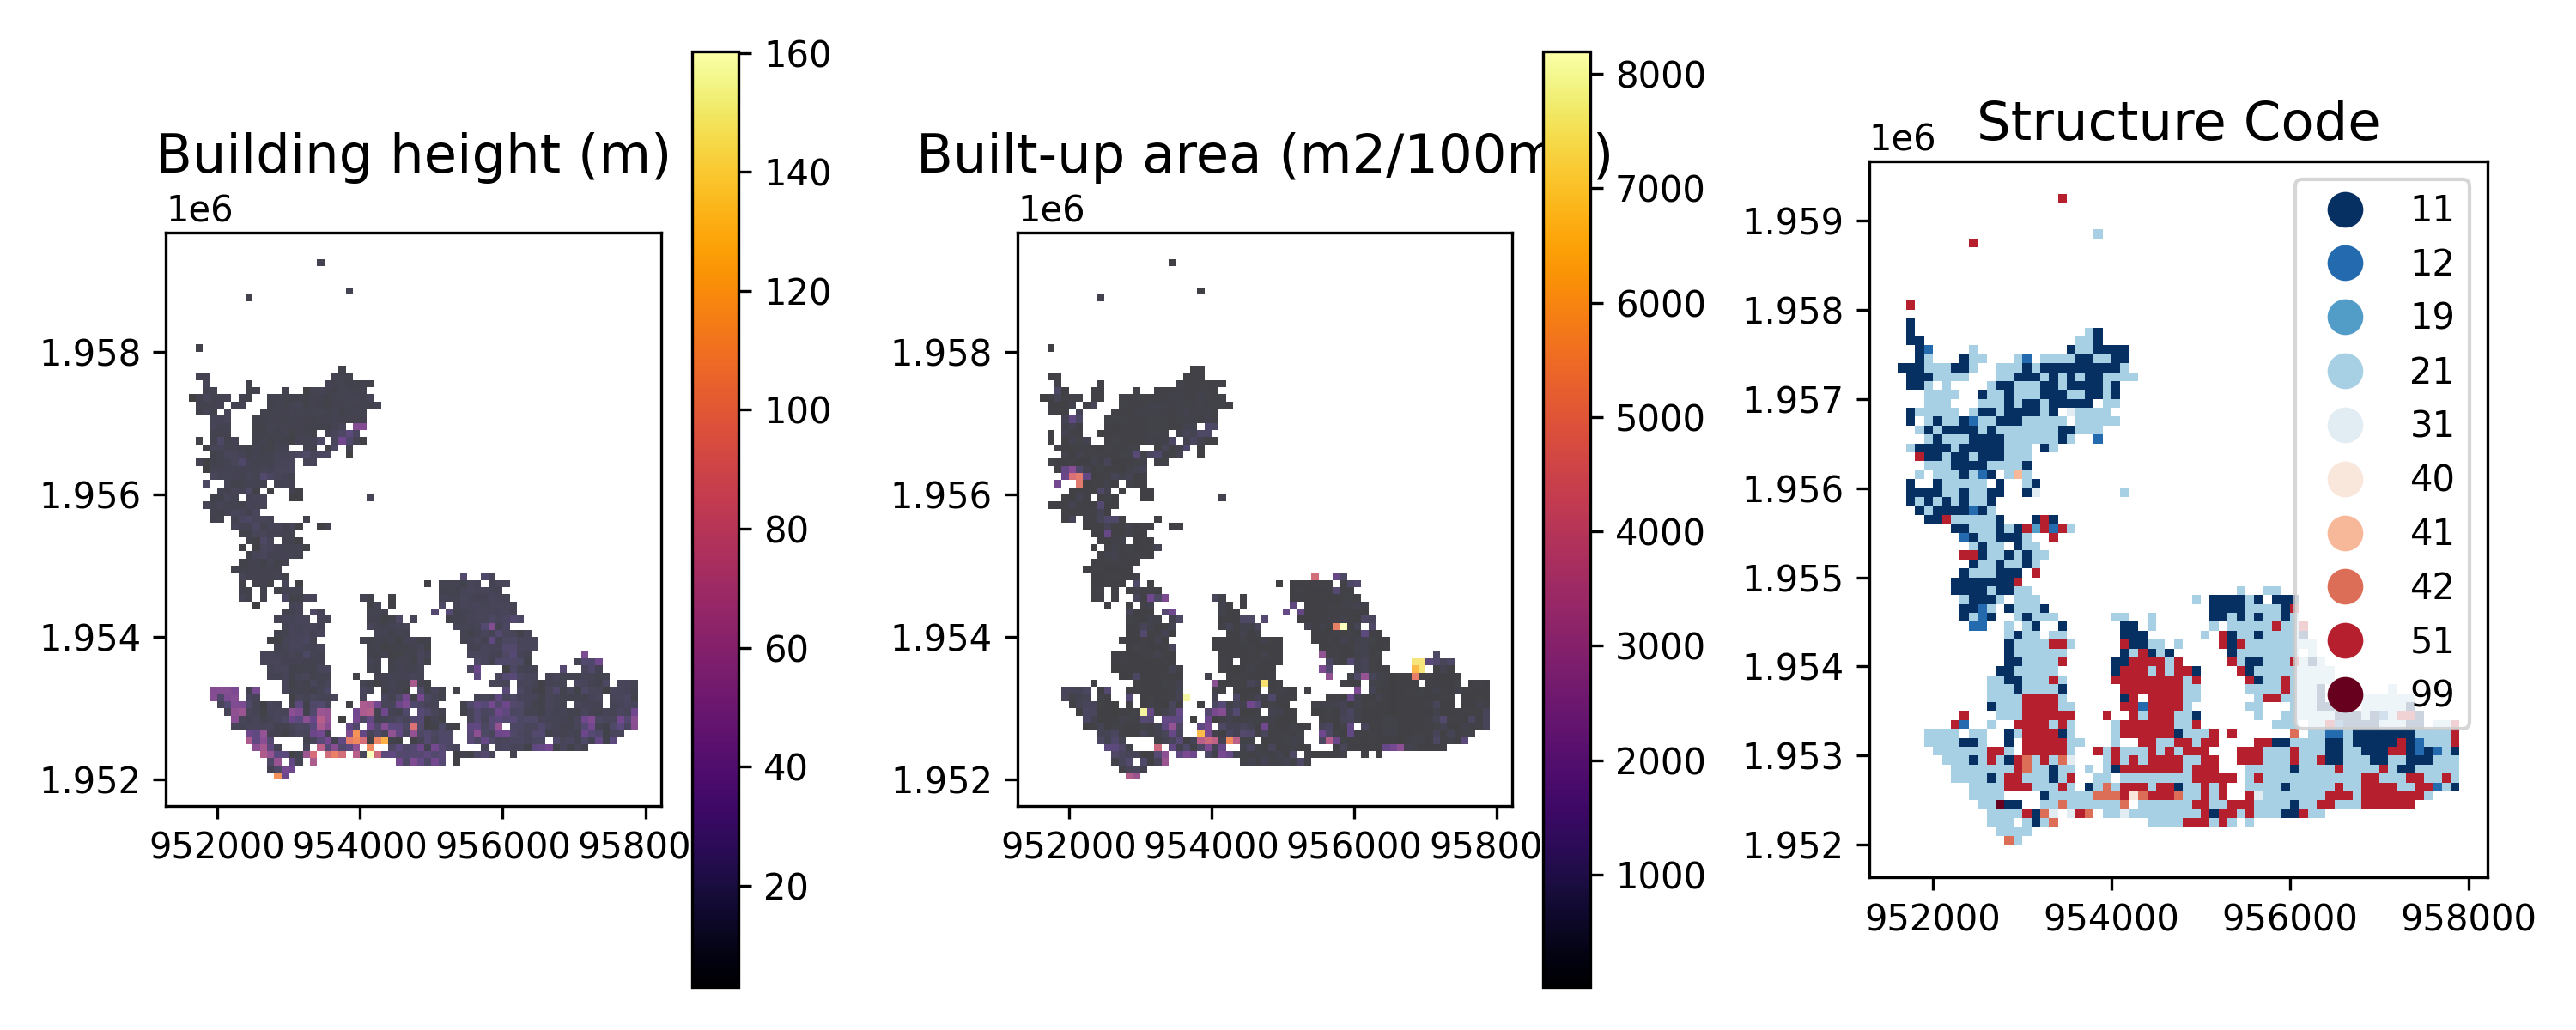

In [ ]:
# both work
import matplotlib.image as mpimg
img = mpimg.imread('images/Builtup_Jongno-gu_Feb2023.png')
imgplot = plt.imshow(img)
plt.show()

from PIL import Image
image = Image.open('images/Builtup_Jongno-gu_Feb2023.png')
image.show()

### 2. Data pre-processing

The original data are stored in vector GIS format. For the further analysis, we want to rasterise them into the default grid (100 m x 100 m).

In [ ]:
# import rasterio pacakge 
try:
  import rasterio
except:
  !pip install rasterio
  import rasterio

# import transform and features
from rasterio import transform
from rasterio import features
from rasterio.enums import Resampling


Rasterio를 이용해서 원본 벡터 자료를 래스터 자료로 변환

In [ ]:
# Create a base 100 m grid 
dummy_shp = builtuparea_gdf
bbox = dummy_shp.total_bounds
xmin, ymin, xmax, ymax = bbox
res = 100 # desired resolution
w = (xmax - xmin) // res 
h = (ymax - ymin) // res

# float type for continuous data
out_meta_float64 = {
    "driver": "GTiff",
    "dtype": "float64", # 64bit float
    "height": h,
    "width": w,
    "count": 1,
    "crs": dummy_shp.crs,
    "transform": transform.from_bounds(xmin, ymin, xmax, ymax, w, h),
    "compress": 'lzw'
}

# unit8 for categorical data
out_meta_uint8 = {
    "driver": "GTiff",
    "dtype": "uint8",
    "height": h,
    "width": w,
    "count": 1,
    "crs": dummy_shp.crs,
    "transform": transform.from_bounds(xmin, ymin, xmax, ymax, w, h),
    "compress": 'lzw'
}

In [ ]:
height_out_fn = './images/height_100m.tif'
 
# convert height
with rasterio.open(height_out_fn, 'w+', **out_meta_float64) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(height_gdf.geometry, height_gdf.val))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)




In [ ]:
!ls images

area_100m.tif		       code_100m.tif	volume_100m.tif
Builtup_Jongno-gu_Feb2023.png  height_100m.tif
Builtup_Jongno-gu.png	       rasterized.tif


<open DatasetReader name='images/height_100m.tif' mode='r'>


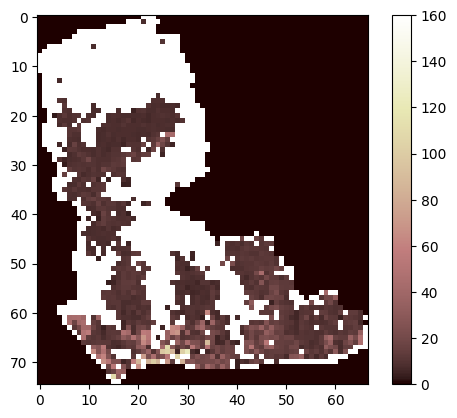

In [ ]:
# read the outcome rasters
height_100m_r = rasterio.open('images/height_100m.tif')
print(height_100m_r)

# Plot the image
height_100m_img = height_100m_r.read(1)
height_100m_img.shape # The returned object is a 2-dimensional Numpy ndarray. The representation of that array at the Python prompt is a summary; the GeoTIFF file that Rasterio uses for testing has 0 values in the corners, but has nonzero values elsewhere.

plt.imshow(height_100m_img, cmap='pink')
plt.colorbar()
plt.show()  


In [ ]:
# do the builtup_area

area_out_fn = './images/area_100m.tif'

# convert area
with rasterio.open(area_out_fn, 'w+', **out_meta_float64) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(builtuparea_gdf.geometry, builtuparea_gdf.val))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)


 
# read the outcome rasters
area_100m_r = rasterio.open('images/area_100m.tif') # DatasetReader class
area_100m_img = area_100m_r.read(1) # numpy class


In [ ]:
height_100m_r
area_100m_r

<open DatasetReader name='images/area_100m.tif' mode='r'>

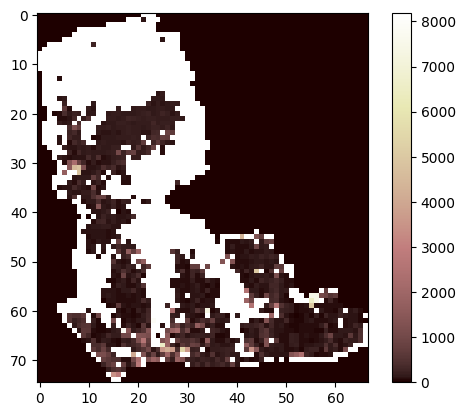

In [ ]:
plt.imshow(area_100m_img, cmap='pink')
plt.colorbar()
plt.show()

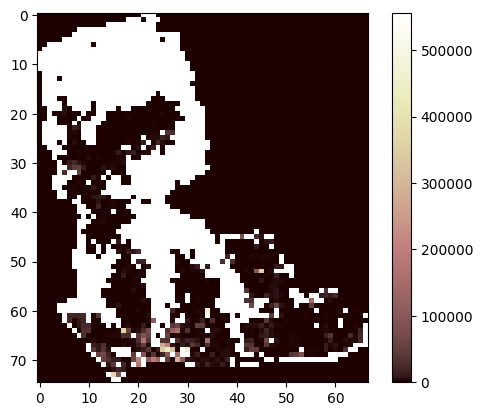

In [ ]:
volume_100m_img = height_100m_img * area_100m_img

# plot
plt.imshow(volume_100m_img, cmap='pink')
plt.colorbar()
plt.show()  

In [ ]:
# Save the volume raster to a file

volume_out_fn = './images/volume_100m.tif'

with rasterio.open(volume_out_fn, 'w+', **out_meta_float64) as dst:
    dst.write_band(1, volume_100m_img)

os.listdir('images')

['rasterized.tif',
 'Builtup_Jongno-gu.png',
 'Builtup_Jongno-gu_Feb2023.png',
 'height_100m.tif',
 'area_100m.tif',
 'volume_100m.tif',
 'code_100m.tif']

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 67, 'height': 75, 'count': 1, 'crs': CRS.from_epsg(5179), 'transform': Affine(100.0, 0.0, 951300.0,
       0.0, -100.0, 1959400.0), 'blockysize': 15, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


Text(0, 0.5, 'Row #')

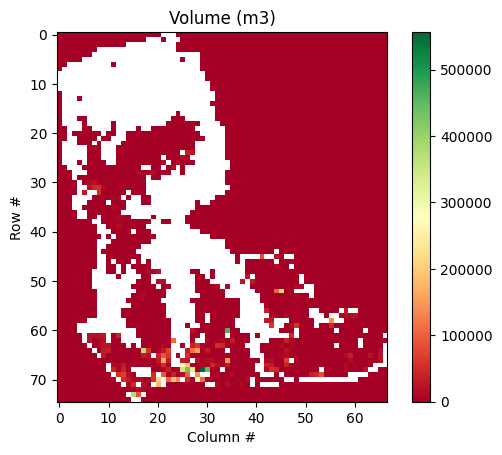

In [ ]:
# Reopen the file and plot
with rasterio.open(volume_out_fn) as src:
    print(src.profile)
    volume = src.read(1) # read the entire array

plt.imshow(volume, cmap='RdYlGn')
plt.colorbar()
plt.title('Volume (m3)')
plt.xlabel('Column #')
plt.ylabel('Row #')


AttributeError: ignored

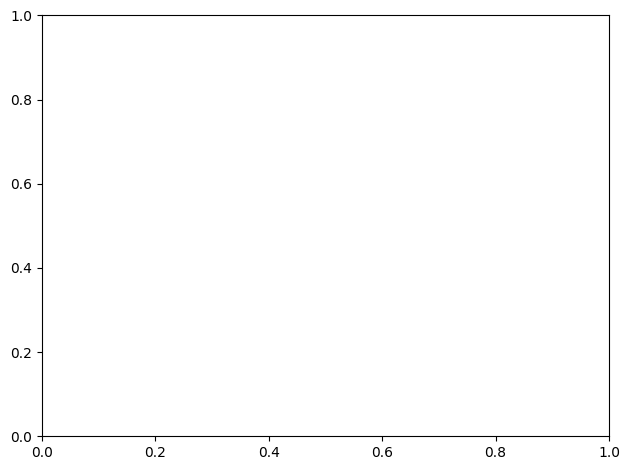

In [ ]:
#Note that rasterio also has a convenienct method for plotting with georeferenced coordinates
# in this case, coordinates are Easting [m] and Northing [m], and colorbar is default instead of RdYlGn

import rasterio.plot

with rasterio.open(volume_out_fn) as src:
    fig, ax = plt.subplots()
    plt.tight_layout()
    rasterio.plot.show(src, ax=ax, title='Volume (m3)')

In [ ]:
# Structure Code



UFuncTypeError: ignored

In [ ]:
# Have to remove 'NaN' from the data and convert the data type to integer
code_tmp = gpd.pd.to_numeric(code_gdf.lbl, errors='coerce')
code_gdf['code'] = code_tmp

# Now a new column 'code' is there
print(code_gdf.columns)
print(code_gdf.code.dtype) # now int64

# Drop NaN or NA
code_gdf = code_gdf.dropna(subset=['code'])
# Convert dtype
code_gdf['code'] = code_gdf['code'].astype(int)
 

Index(['gid', 'lbl', 'val', 'geometry', 'code'], dtype='object')
int64


In [ ]:
code_out_fn = './images/code_100m.tif'

# convert code
with rasterio.open(code_out_fn, 'w+', **out_meta_uint8) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(code_gdf.geometry, code_gdf.code))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)



{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 67, 'height': 75, 'count': 1, 'crs': CRS.from_epsg(5179), 'transform': Affine(100.0, 0.0, 951300.0,
       0.0, -100.0, 1959400.0), 'blockysize': 75, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


Text(0, 0.5, 'Row #')

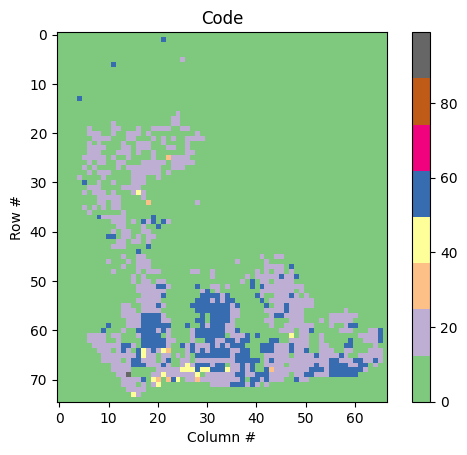

In [ ]:
# Reopen the file and plot
with rasterio.open(code_out_fn) as src:
    print(src.profile)
    code_img = src.read(1) # read the entire array

plt.imshow(code_img, cmap='Accent')
plt.colorbar()
plt.title('Code')
plt.xlabel('Column #')
plt.ylabel('Row #')